In [7]:
# The data set contains images of handwritten Chinese characters that represent numbers
# There are 15 distinct characters, each with 1000 images

# Character: Value
# 零:  1
# 一:  2
# 二:  3
# 三:  4
# 四:  5
# 五:  6
# 六:  7
# 七:  8
# 八:  9
# 九:  10
# 十:  100
# 百:  1000
# 千:  10000
# 万:  100000
# 亿:  100000000

In [8]:
import os
# current working directory
cwd = os.getcwd()
# directory containing the JPG files
data_dir = os.path.join(cwd, 'data')

def is_jpg(path):
    '''
    Returns:
        bool: True if the path ends with '.jpg', false otherwise
    '''
    return path.endswith('.jpg')

# set of JPG files in the directory
jpg_files = [
    os.path.join(data_dir, path)
    for path
    in os.listdir(data_dir)
    if is_jpg(path)
]

In [17]:
! pip install scikit-image
! pip install PIL

   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ------- -------------------------------- 2.4/12.8 MB 19.2 MB/s eta 0:00:01
   -------------------- ------------------- 6.6/12.8 MB 17.5 MB/s eta 0:00:01
   --------------------------------- ------ 10.7/12.8 MB 18.7 MB/s eta 0:00:01
   ---------------------------------------- 12.8/12.8 MB 18.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 2.0/2.0 MB 28.1 MB/s eta 0:00:00

   -------- ------------------------------- 1/5 [networkx]
   -------- ------------------------------- 1/5 [networkx]
   -------- ------------------------------- 1/5 [networkx]
   -------- ------------------------------- 1/5 [networkx]
   -------- ------------------------------- 1/5 [networkx]
   -------- ------------------------------- 1/5 [networkx]
   -------- ------------------------------- 1/5 [networkx]
   -------- ------------------------------- 1/5 [network

ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


In [18]:
import numpy as np
import pandas as pd
from PIL import Image
import skimage.io
import skimage.transform

# read the CSV file into a dataframe
dataframe = pd.read_csv('./data/chinese_mnist.csv')

def get_filename(row):
    '''
    Parameters:
        row (pandas.Series): row of the dataframe
    Returns:
        str: filename of the image
    '''
    suite_id = row['suite_id']
    sample_id = row['sample_id']
    code = row['code']
    return f'input_{suite_id}_{sample_id}_{code}.jpg'

def get_filepath(row):
    '''
    Parameters:
        row (pandas.Series): row of the dataframe
    Returns:
        str: absolute filepath of the image
    '''
    filename = row['filename']
    return os.path.join(data_dir, filename)

def get_image_dimensions(row):
    '''
    Parameters:
        row (pandas.Series): row of the dataframe
    Returns:
        tuple: dimensions of the image
    '''
    filepath = row['filepath']
    return Image.open(filepath).size

def get_image_dimensions_v2(row):
    '''
    Parameters:
        row (pandas.Series): row of the dataframe
    Returns:
        tuple: dimensions of the image
    '''
    filepath = row['filepath']
    image = skimage.io.imread(filepath)
    return image.shape

def get_image_bitmap(row):
    '''
    Parameters:
        row (pandas.Series): row of the dataframe
    Returns:
        numpy.ndarray: bitmap of the image
    '''
    filepath = row['filepath']
    bitmap = np.array(Image.open(filepath))
    return bitmap

def get_image_bitmap_v2(row):
    '''
    Parameters:
        row (pandas.Series): row of the dataframe
    Returns:
        numpy.ndarray: bitmap of the image
    '''
    filepath = row['filepath']
    bitmap = skimage.io.imread(filepath)
    return bitmap

def get_grayscale_image_bitmap(row):
    '''
    Parameters:
        row (pandas.Series): row of the dataframe
    Returns:
        numpy.ndarray: grayscale bitmap of the image
    '''
    filepath = row['filepath']
    bitmap = skimage.io.imread(filepath, as_gray=True)
    return bitmap


dataframe['filename'] = dataframe.apply(get_filename, axis=1)
dataframe['filepath'] = dataframe.apply(get_filepath, axis=1)
dataframe['image_dimensions'] = dataframe.apply(get_image_dimensions, axis=1)
dataframe['image_dimensions_v2'] = dataframe.apply(get_image_dimensions_v2, axis=1)
dataframe['bitmap'] = dataframe.apply(get_image_bitmap, axis=1)
dataframe['bitmap_v2'] = dataframe.apply(get_image_bitmap_v2, axis=1)
dataframe['grayscale_bitmap'] = dataframe.apply(get_grayscale_image_bitmap, axis=1)

dataframe

,suite_id,sample_id,code,value,character,filename,filepath,image_dimensions,image_dimensions_v2,bitmap,bitmap_v2,grayscale_bitmap
0,1,1,10,9,九,input_1_1_10.jpg,e:\Users\walkersmith\developer\repos\machine-l...,"(64, 64)","(64, 64)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,1,10,10,9,九,input_1_10_10.jpg,e:\Users\walkersmith\developer\repos\machine-l...,"(64, 64)","(64, 64)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,1,2,10,9,九,input_1_2_10.jpg,e:\Users\walkersmith\developer\repos\machine-l...,"(64, 64)","(64, 64)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,1,3,10,9,九,input_1_3_10.jpg,e:\Users\walkersmith\developer\repos\machine-l...,"(64, 64)","(64, 64)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,1,4,10,9,九,input_1_4_10.jpg,e:\Users\walkersmith\developer\repos\machine-l...,"(64, 64)","(64, 64)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,99,5,9,8,八,input_99_5_9.jpg,e:\Users\walkersmith\developer\repos\machine-l...,"(64, 64)","(64, 64)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
14996,99,6,9,8,八,input_99_6_9.jpg,e:\Users\walkersmith\developer\repos\machine-l...,"(64, 64)","(64, 64)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
14997,99,7,9,8,八,input_99_7_9.jpg,e:\Users\walkersmith\developer\repos\machine-l...,"(64, 64)","(64, 64)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
14998,99,8,9,8,八,input_99_8_9.jpg,e:\Users\walkersmith\developer\repos\machine-l...,"(64, 64)","(64, 64)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [19]:
# Let us begin by ensuring we have all the image instances on disk

expected_file_paths = dataframe['filepath']

# determine if there are any missing files on disk by comparing the two sets
are_all_expected_files_on_disk = set(sorted(expected_file_paths)) == set(sorted(jpg_files))
# All the files are present on disk
print(are_all_expected_files_on_disk)


True


In [20]:
# Let's make sure the images are all the same size

# size of each image
expected_image_dimensions = (64, 64)

# vector of images that are not the expected size
non_standard_sized_images = dataframe[dataframe['image_dimensions'] != expected_image_dimensions]

# Images are normalized and contain the same size, aspect ratio, and orientation
print(non_standard_sized_images)

Empty DataFrame
Columns: [suite_id, sample_id, code, value, character, filename, filepath, image_dimensions, image_dimensions_v2, bitmap, bitmap_v2, grayscale_bitmap]
Index: []


In [21]:
number_of_suites = dataframe['suite_id'].nunique()
number_of_samples = dataframe['sample_id'].nunique()
number_of_classes = dataframe['code'].nunique()
number_of_instances = len(dataframe)

print(f'Number of suites: {number_of_suites}')
print(f'Number of samples: {number_of_samples}')
print(f'Number of classes: {number_of_classes}')
print(f'Number of images: {number_of_instances}')

Number of suites: 100
Number of samples: 10
Number of classes: 15
Number of images: 15000


In [22]:
# Create a nxn collage of images from a directory of JPG files
# This will help us visualize the dataset and identify any preprocessing steps that need to be performed
collage_output_filepath = './output/collage.jpg'

# number of images is the number of instances in the dataset
num_images = number_of_instances

# size of each image can be a single dimension since they are all square
image_size = expected_image_dimensions[0]

# number of columns in the grid/collage is the number of classes, one for each character
number_of_columns = number_of_classes
# number of rows in the grid/collage so that 15000 images fit in 15 columns
number_of_rows = number_of_samples * number_of_suites
# width and height of the grid/collage
collage_width = number_of_columns * image_size
collage_height = number_of_rows * image_size

# create a new blank image for the collage
collage = Image.new('RGB', (collage_width, collage_height))

# flag to indicate if the collage should be generated
# set to False to avoid generating the collage every time the notebook is run
should_generate_collage = False

if should_generate_collage:
    for i in range(number_of_rows):
        for j in range(number_of_columns):
            # calculate the x and y coordinates of the current grid cell
            x = j * collage_width // number_of_columns
            y = i * collage_height // number_of_rows
            # calculate the index of the next JPG file
            next_image_index = i * number_of_columns + j
            # get the filepath of the next JPG file
            filepath = dataframe.iloc[next_image_index]['filepath']
            # load the current JPG file
            img = Image.open(filepath)
            # resize the image to fit the grid cell, without changing the aspect ratio
            # no-operation since all images are the expected size
            img = img.resize(expected_image_dimensions)
            # paste the resized image into the current grid cell
            collage.paste(img, (x, y))

    # save the collage image to a file
    collage.save(collage_output_filepath)

In [23]:
from IPython.display import Image

# Images are in a binary format and contain black and white pixels

# display the collage image
Image(filename=collage_output_filepath)

# Avoid rendering the image in the notebook since it is very large
# comment the next line of code to view the collage image inline
comment_out_to_view_collage_inline = True

In [24]:
# While the collage is useful for visualizing the dataset, it is still difficult to view the images at this scale
# Let's create a function that will display a subset of images from the dataset
# For example, we can display the all images of a specific character or all images of a specific suite
# This will help us identify any preprocessing steps that need to be performed
import matplotlib.pyplot as plt
from skimage import color, filters

def get_subplot(ax, i, number_of_instances):
    if number_of_instances > number_of_classes:
        row_index = i // number_of_classes
        column_index = i % number_of_classes
        position = (row_index, column_index)
        return ax[position]
    elif number_of_instances > 1:
        return ax[i]
    return ax

def get_filtered_image_arguments(instance_vector):
    grayscale_bitmap = instance_vector['grayscale_bitmap']
    threshold_value = filters.threshold_otsu(grayscale_bitmap)
    binary = grayscale_bitmap > threshold_value
    return binary, {'cmap': 'gray'}

def get_unfiltered_image_arguments(instance_vector):
    bitmap = instance_vector['bitmap']
    # convert the color channel order to RGB since 'imshow' expects RGB order
    bitmap = color.gray2rgb(bitmap)
    return bitmap, {}

def show_images(df, should_render_with_filter=True):
    number_of_instances = df.shape[0]
    # if the number of instances is less than or equal to the number of classes, then there is only one row
    is_single_row = number_of_instances <= number_of_classes
    number_of_rows = 1 if is_single_row else number_of_instances // number_of_classes
    # if there is only one row, then the number of columns is the number of instances
    # otherwise, there is a column for each 
    number_of_columns = number_of_instances if is_single_row else number_of_classes

    figure_dimensions = (number_of_columns, number_of_rows)

    f, ax = plt.subplots(
        number_of_rows,
        number_of_columns,
        figsize=figure_dimensions,
    )
    for i, idx in enumerate(df.index):
        subplot = get_subplot(ax, i, number_of_instances)
        instance_vector = df.iloc[idx]

        get_image_arguments = get_filtered_image_arguments \
            if should_render_with_filter \
            else get_unfiltered_image_arguments

        image_data, kwargs = get_image_arguments(instance_vector)
        subplot.imshow(image_data, **kwargs)
        subplot.axis('off')

    plt.show()

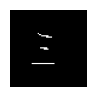

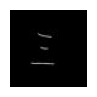

In [25]:
single_instance = dataframe.sample(1).reset_index()

show_images(single_instance)
show_images(single_instance, should_render_with_filter=False)

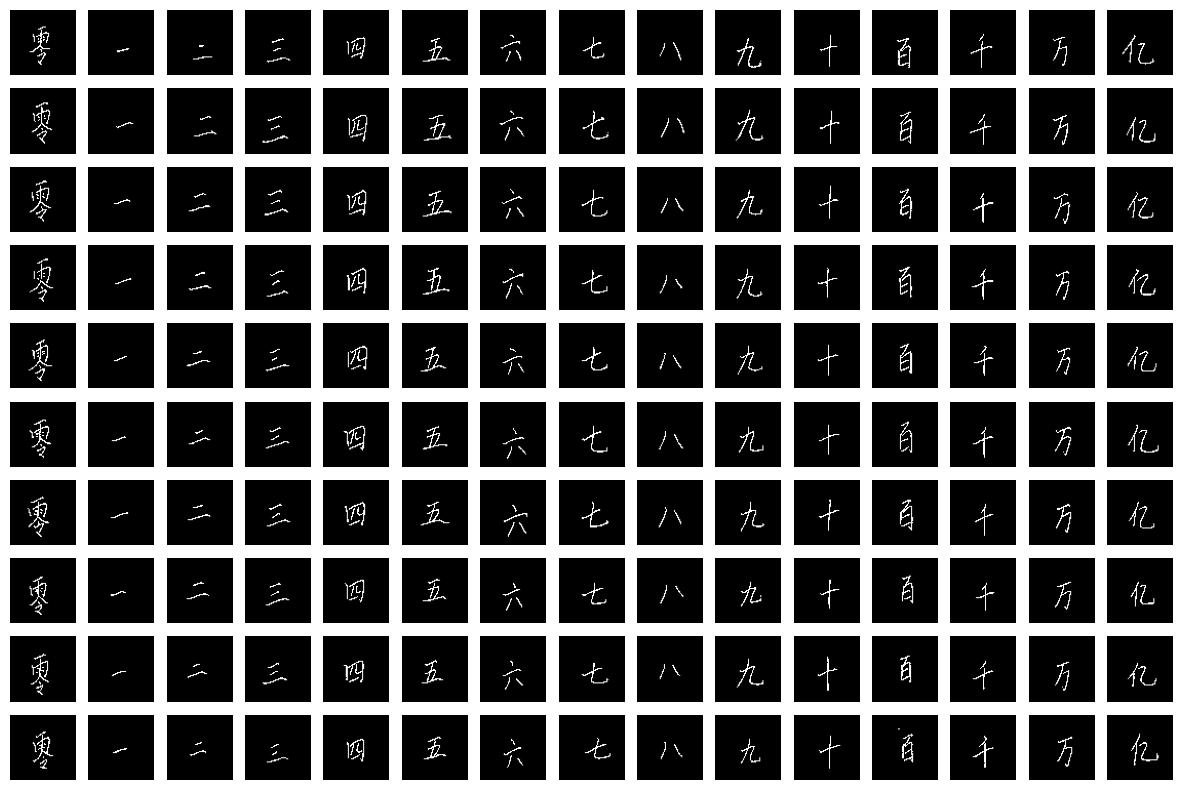

In [26]:
# predicate to filter the dataframe to include only images produced by the first volunteer
by_first_volunteer = dataframe.suite_id==1
# sort by sample_id and value to ensure the images are displayed in the correct order
by_sample_and_value = ["sample_id", "value"]

# apply the predicate to obtain a subset of images
all_instances_from_first_volunteer = dataframe.loc[by_first_volunteer] \
    .sort_values(by=by_sample_and_value) \
    .reset_index()

show_images(all_instances_from_first_volunteer)

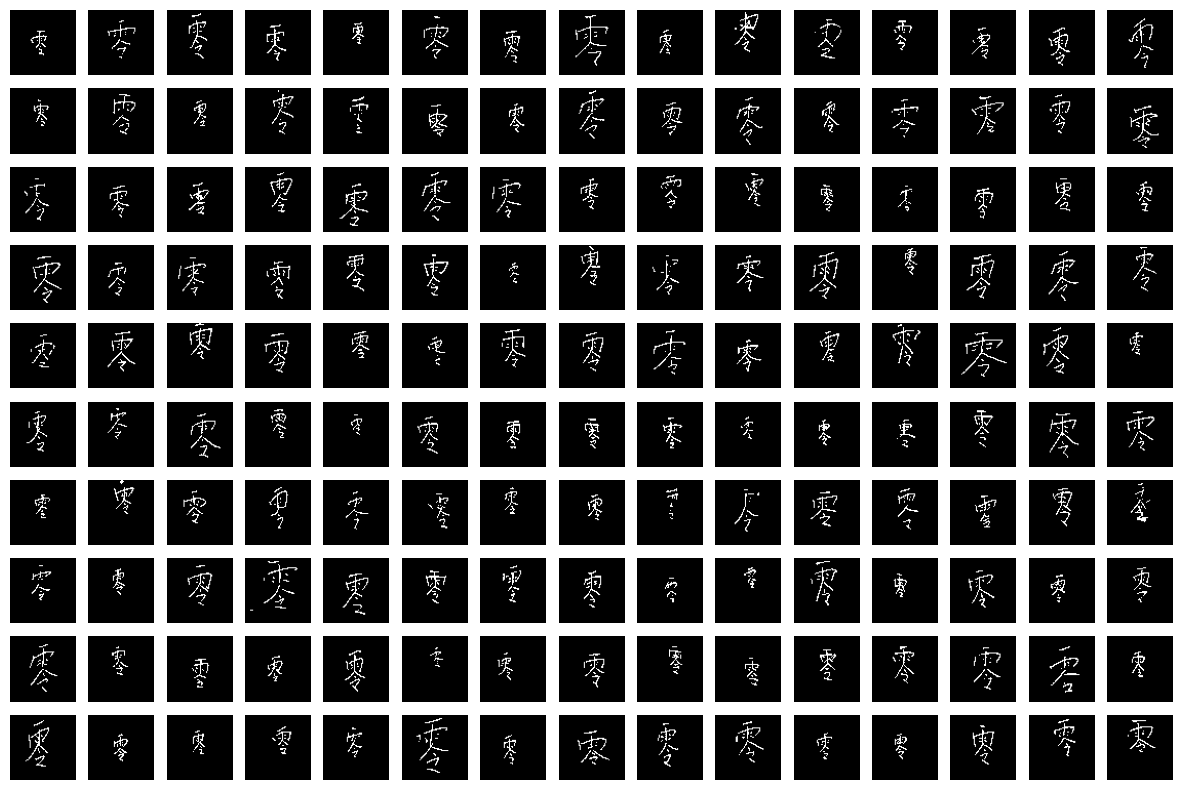

In [27]:
# predicate to filter the dataframe to only include images of the character '零'
by_first_digit = dataframe.code == 1
# number of images to display
all = 150
# apply the predicate to obtain a subset of images
all_instances_of_first_digit = dataframe.loc[by_first_digit].sample(all).reset_index()
show_images(all_instances_of_first_digit)

In [30]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

number_of_components = 75

bitmaps = np.stack(dataframe['bitmap'].map(lambda x: np.ravel(x)).to_numpy())

features = PCA(n_components=number_of_components).fit_transform(bitmaps)

# create a cluster for each character
number_of_clusters = number_of_classes

number_of_executions_with_different_centroid_seeds = 'auto'

# construct an instance of a KMeans model
kmeans = KMeans(
    n_clusters=number_of_clusters,
    n_init=number_of_executions_with_different_centroid_seeds,
    random_state=0
)

# fit the model to the features
kmeans = kmeans.fit(features)

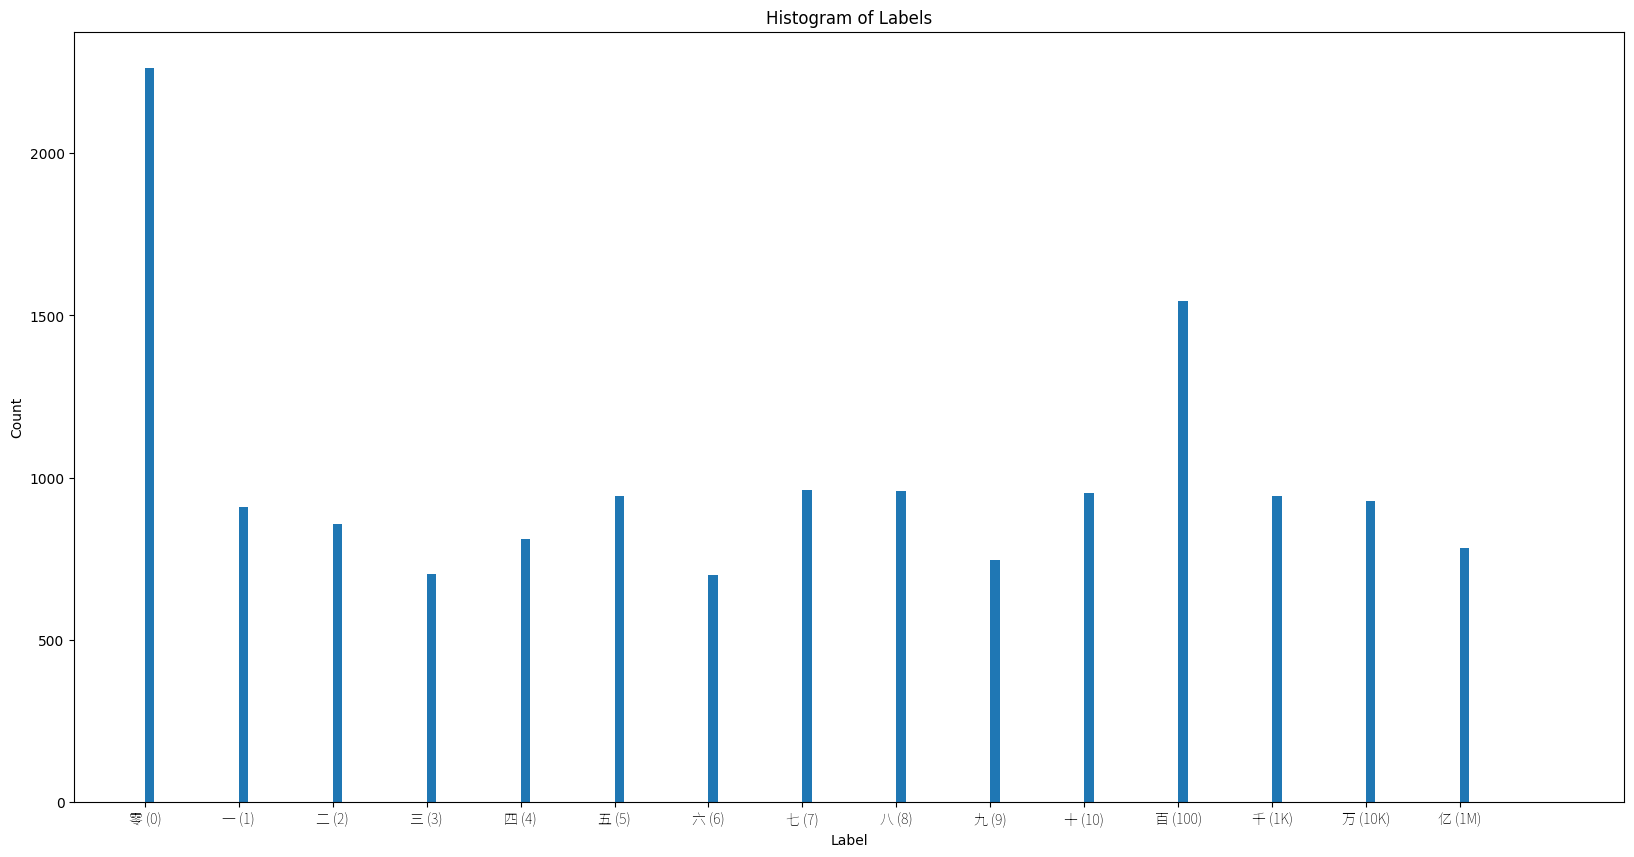

In [31]:

import matplotlib.font_manager as fm

# Since we know there are 15 distinct characters with an equal number of instances, we expect each cluster to contain 1000 images
# We can use a histogram to visualize the distribution of the predictions
# Every interval should contain 1000 images if we have no misclassifications

# reduced width of each interval in the histogram used to create a gap in between the bins
reduced_width_to_simulate_gap_between_bins = 0.1
# align the bins in the center of their respective intervals
horizontally_centered = 'mid'
# number of intervals in the histogram
number_of_intervals = range(kmeans.n_clusters+1)
# control the number of ticks on the x-axis
set_of_x_ticks = range(kmeans.n_clusters)
# set of unicode characters used to label the x-axis
set_of_x_labels = [
    '零 (0)',
    '一 (1)',
    '二 (2)',
    '三 (3)',
    '四 (4)',
    '五 (5)',
    '六 (6)',
    '七 (7)',
    '八 (8)',
    '九 (9)',
    '十 (10)',
    '百 (100)',
    '千 (1K)',
    '万 (10K)',
    '亿 (1M)',
]
# file path to local font file
font_path = './fonts/NotoSansSC-VariableFont_wght.ttf'
# font family font property used to ensure the unicode characters are displayed correctly
font_family = fm.FontProperties(fname=font_path)

plt.figure(figsize=(20, 10))

# create a histogram of the predictions
plt.hist(
    kmeans.labels_,
    bins=number_of_intervals,
    width=reduced_width_to_simulate_gap_between_bins,
    align=horizontally_centered
)
# set the title and axis labels
plt.title('Histogram of Labels')
plt.xlabel('Label')
plt.xticks(
    set_of_x_ticks,
    set_of_x_labels,
    fontproperties=font_family
)
plt.ylabel('Count')

plt.show()

In [32]:
label_pairs = [
    (dataframe.iloc[i]['code'], kmeans.labels_[i])
    for i
    in range(len(kmeans.labels_))
]

correct_classifications = [
    (actual, predicted)
    for (actual, predicted)
    in label_pairs
    if actual == predicted
]

print(f'{len(correct_classifications)} out of {len(kmeans.labels_)} classifications were correct')

1007 out of 15000 classifications were correct


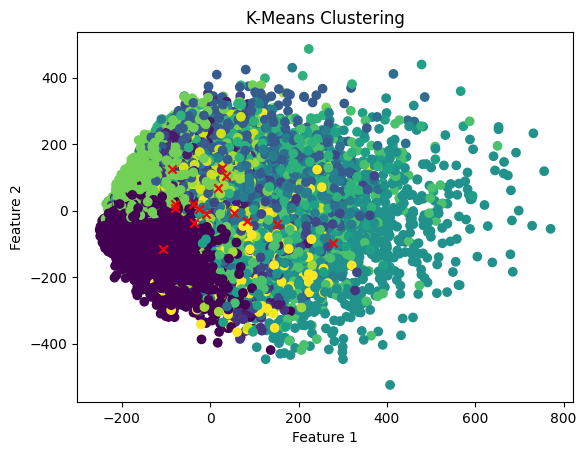

In [33]:
plt.scatter(
    features[:, 0],
    features[:, 1],
    c=kmeans.labels_
)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    marker='x',
    color='r'
)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()